In [21]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import csv

# Convert '?' value into NaN

In [22]:
df =pd.read_csv("switzerland.csv", na_values=['?','na','Na'], header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,32,1,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34,1,4,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36,1,4,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38,0,4,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115.0,0,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,1
119,70,1,4,140.0,0,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0,3
120,72,1,3,160.0,0,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN,0
121,73,0,3,160.0,0,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,1


# change column name

In [23]:
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [24]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34,1,4,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36,1,4,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38,0,4,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115.0,0,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,1
119,70,1,4,140.0,0,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0,3
120,72,1,3,160.0,0,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN,0
121,73,0,3,160.0,0,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,1


# Check the Null Value

In [5]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      2
chol          0
fbs          75
restecg       1
thalach       1
exang         1
oldpeak       6
slope        17
ca          118
thal         52
num           0
dtype: int64

# Check the  data distributive for applying mean and median

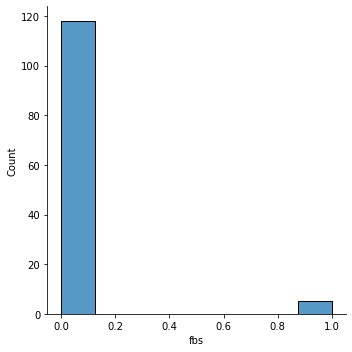

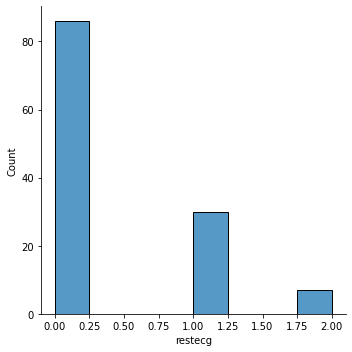

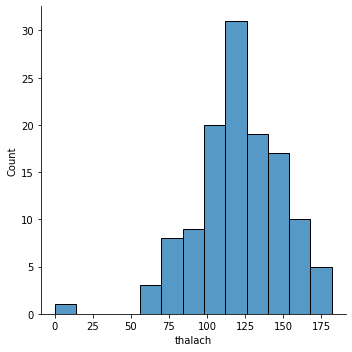

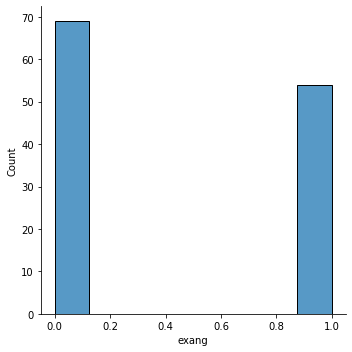

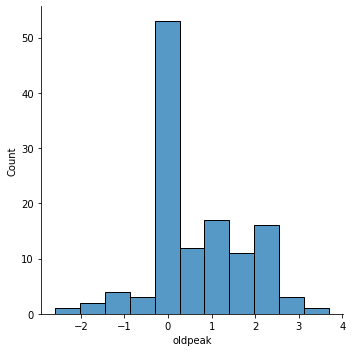

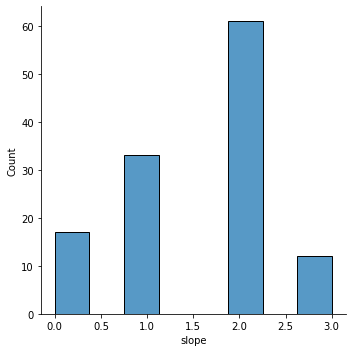

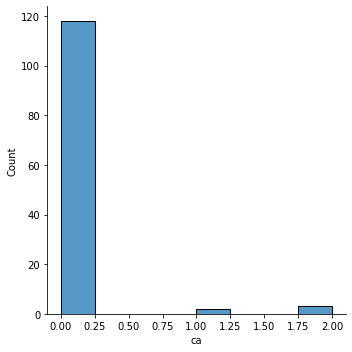

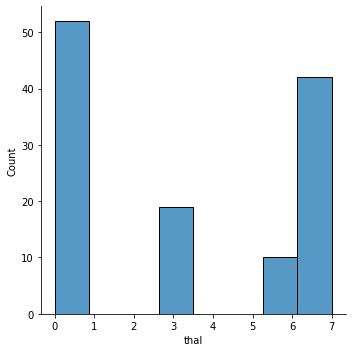

In [38]:
sns.displot(df['fbs'])
sns.displot(df['restecg'])
sns.displot(df['thalach'])
sns.displot(df['exang'])
sns.displot(df['oldpeak'])
sns.displot(df['slope'])
sns.displot(df['ca'])
sns.displot(df['thal'])

# Replace the value of NaN by median

In [35]:
df.fillna(df.trestbps.median(),inplace=True)
df.fillna(df.fbs.median(),inplace=True)
df.fillna(df.restecg.median(),inplace=True)
df.fillna(df.thalach.median(),inplace=True)
df.fillna(df.exang.median(),inplace=True)
df.fillna(df.oldpeak.median(),inplace=True)
df.fillna(df.slope.median(),inplace=True)
df.fillna(df.ca.median(),inplace=True)
df.fillna(df.thal.median(),inplace=True)


In [37]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95.0,0,0.0,0.0,127.0,0.0,0.7,1.0,0.0,0.0,1
1,34,1,4,115.0,0,0.0,0.0,154.0,0.0,0.2,1.0,0.0,0.0,1
2,35,1,4,125.0,0,0.0,0.0,130.0,1.0,0.0,0.0,0.0,7.0,3
3,36,1,4,110.0,0,0.0,0.0,125.0,1.0,1.0,2.0,0.0,6.0,1
4,38,0,4,105.0,0,0.0,0.0,166.0,0.0,2.8,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115.0,0,0.0,1.0,92.0,1.0,0.0,2.0,0.0,7.0,1
119,70,1,4,140.0,0,1.0,0.0,157.0,1.0,2.0,2.0,0.0,7.0,3
120,72,1,3,160.0,0,0.0,2.0,114.0,0.0,1.6,2.0,2.0,0.0,0
121,73,0,3,160.0,0,0.0,1.0,121.0,0.0,0.0,1.0,0.0,3.0,1


In [38]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [39]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.049042,-0.033295,0.358825,NaN,0.120893,0.274539,-0.314926,-0.033004,0.145756,0.083622,0.170536,0.078682,0.050689
sex,-0.049042,1.000000,0.043017,-0.085113,NaN,0.061236,0.080047,-0.122586,0.083337,-0.054039,0.088721,0.058446,0.108011,0.089853
cp,-0.033295,0.043017,1.000000,-0.018869,NaN,0.090275,-0.237887,-0.067325,0.268548,0.162727,0.062288,-0.200271,0.175821,0.232277
trestbps,0.358825,-0.085113,-0.018869,1.000000,NaN,0.100449,0.189544,-0.183232,0.127442,0.077392,-0.238018,0.009942,0.312630,0.131133
chol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fbs,0.120893,0.061236,0.090275,0.100449,NaN,1.000000,0.014847,0.041423,-0.016187,0.035405,0.011449,-0.040443,0.187169,0.202940
restecg,0.274539,0.080047,-0.237887,0.189544,NaN,0.014847,1.000000,-0.030256,-0.120658,-0.091993,-0.103482,0.299078,0.035188,0.049268
thalach,-0.314926,-0.122586,-0.067325,-0.183232,NaN,0.041423,-0.030256,1.000000,-0.172553,0.188204,0.072414,0.010924,-0.317725,-0.312410
exang,-0.033004,0.083337,0.268548,0.127442,NaN,-0.016187,-0.120658,-0.172553,1.000000,0.163234,0.138093,-0.074834,0.305164,0.122321
oldpeak,0.145756,-0.054039,0.162727,0.077392,NaN,0.035405,-0.091993,0.188204,0.163234,1.000000,0.147360,-0.016028,-0.143699,0.158935


<AxesSubplot:>

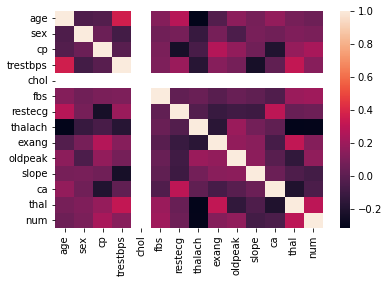

In [40]:
sns.heatmap(df.corr())

# Find the target number


In [42]:
df['num'].value_counts()

1    48
2    32
3    30
0     8
4     5
Name: num, dtype: int64

In [43]:
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
print(x.shape,x_train.shape,y_train.shape)

(123, 13) (98, 13) (98,)


In [46]:
logistic = LogisticRegression()

In [47]:
logistic.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
y_pred_logistic = logistic.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score


In [50]:
logistic_Acc = accuracy_score(y_test,y_pred_logistic)
print(logistic_Acc)

0.4


In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = [
    {
        'penalty' : ['l1','l2','elasticnet','none'],
        'C'       : np.logspace(-4,4,20),
        'solver'  : ['lbfgs','newton-cg','liblinear','sag','saga'],
        'max_iter' : [100,1000,2500,5000]
    }
]


In [53]:
clf = GridSearchCV(logistic,param_grid = param_grid, cv = 4, verbose= True, n_jobs=-1)

In [54]:
best_clf = clf.fit(x,y)

Fitting 4 folds for each of 1600 candidates, totalling 6400 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2880 fits failed out of a total of 6400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(

In [61]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, solver='sag')

In [62]:
print(f'Accuracy - : { best_clf.score(x,y):.3f}')

Accuracy - : 0.439


# KNN

In [63]:
model_kneighbors = KNeighborsClassifier()
model_kneighbors.fit(x_train,y_train)

KNeighborsClassifier()

In [64]:
y_pred_kneighbors = model_kneighbors.predict(x_test)

In [65]:
KNeighbors_Acc = accuracy_score(y_test,y_pred_kneighbors)

In [66]:
print(KNeighbors_Acc)

0.32


# After tuning

In [67]:
model_kneighbors = KNeighborsClassifier(n_neighbors=1)
model_kneighbors.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [68]:
y_pred_kneighbors = model_kneighbors.predict(x_test)

In [69]:
KNeighbors_Acc = accuracy_score(y_test,y_pred_kneighbors)

In [70]:
print(KNeighbors_Acc)

0.28
